# Titanic Kaggle Competition
### Name: Tan Zheng

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors

from sklearn import model_selection, metrics, ensemble, preprocessing, impute, linear_model, pipeline, compose, naive_bayes, tree, svm
import seaborn as sns
import matplotlib.pyplot as plt

### Preprocessing

In [2]:
df = pd.read_csv(r"D:\Homework\SoftwareMethod\Titanic\Data\titanic.csv")
X = df.drop(['Name','Survived'], axis = 1)
y = df.Survived

Convert binary column $Sex$ into 0 and 1s.

In [3]:
X['Sex'].replace({
    'male': 0,
    'female': 1
}, inplace=True)

### Train Test Split

Train Test Split size $70%$/$30%$

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

### Logistic Regression

In [5]:
lg_model = pipeline.Pipeline(steps=[
    ('normalise', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', linear_model.LogisticRegression(C=1, solver='newton-cg', penalty='l2'))
])

In [6]:
lg_acc = model_selection.cross_val_score(lg_model, X_train, y_train, cv = model_selection.StratifiedKFold(n_splits= 10, shuffle = True), scoring='accuracy', n_jobs=-1)

Applying 10-fold stratified cross validation to get the accuracy.

### Naive Bayes

In [7]:
gb_model = pipeline.Pipeline(steps=[
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', naive_bayes.GaussianNB()),
])

In [8]:
gb_acc = model_selection.cross_val_score(gb_model, X_train, y_train, cv = model_selection.StratifiedKFold(n_splits= 10, shuffle = True), scoring='accuracy', n_jobs=-1)

### K Nearst Neighbor

In [9]:
knn_model = pipeline.Pipeline(steps=[
    ('normalize', preprocessing.Normalizer()),
    ('scale', preprocessing.MinMaxScaler()),
    ('model', neighbors.KNeighborsClassifier()),
])

In [10]:
knn_acc = model_selection.cross_val_score(knn_model, X_train, y_train, cv = model_selection.StratifiedKFold(n_splits= 10, shuffle = True), scoring='accuracy', n_jobs=-1)

### Picking The Best Model

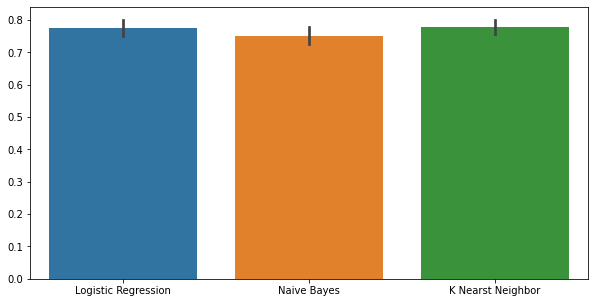

In [11]:
accuracy = pd.DataFrame({
    'Logistic Regression': lg_acc,
    'Naive Bayes': gb_acc,
    'K Nearst Neighbor': knn_acc
})
plt.figure(figsize=(10, 5))
sns.barplot(data = accuracy)
plt.show()

In [12]:
accuracy.mean().sort_values(ascending=False)

K Nearst Neighbor      0.779032
Logistic Regression    0.775806
Naive Bayes            0.751613
dtype: float64

### Test Set Predictions and Accuracy

In [13]:
def assess(pred, y_test):
    acc = ((pred == y_test).sum())/len(y_test)
    return acc

lg_model.fit(X_train,y_train)
gb_model.fit(X_train,y_train)
knn_model.fit(X_train,y_train)

lg_pred = lg_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

lg_acc = assess(lg_pred, y_test)
gb_acc = assess(gb_pred, y_test)
knn_acc = assess(knn_pred, y_test)

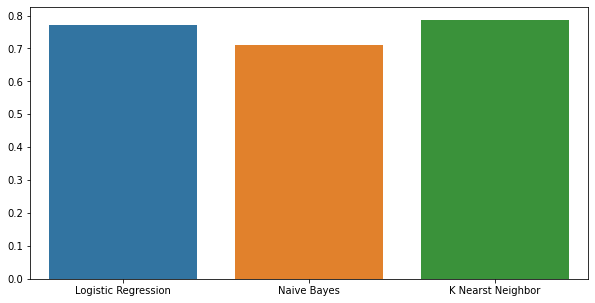

In [15]:
accuracy = pd.DataFrame({
    'Logistic Regression': [lg_acc],
    'Naive Bayes': [gb_acc],
    'K Nearst Neighbor': [knn_acc]
})
plt.figure(figsize=(10, 5))
sns.barplot(data = accuracy)
plt.show()

In [16]:
accuracy.mean().sort_values(ascending=False)

K Nearst Neighbor      0.786517
Logistic Regression    0.771536
Naive Bayes            0.711610
dtype: float64